In [15]:
import pandas as pd
import matplotlib.pyplot as plotter
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.utils import to_categorical

#import warnings
#warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("diagnosed_cbc_data_v4.csv")
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


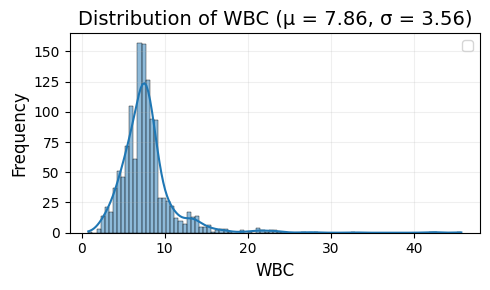

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


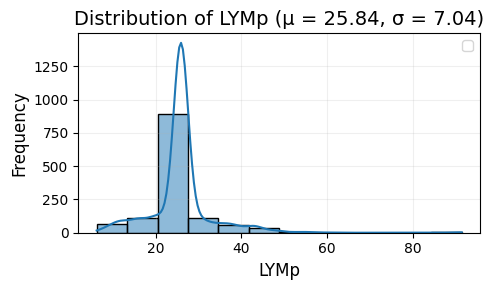

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


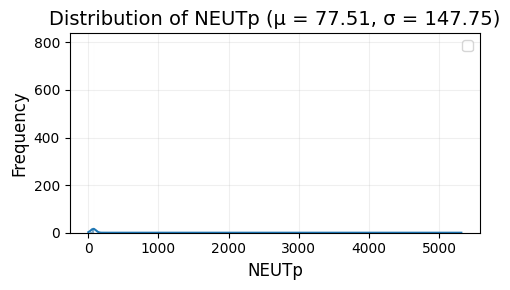

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


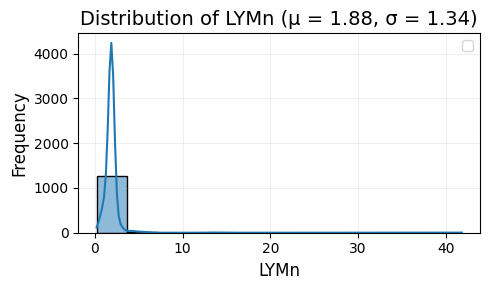

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


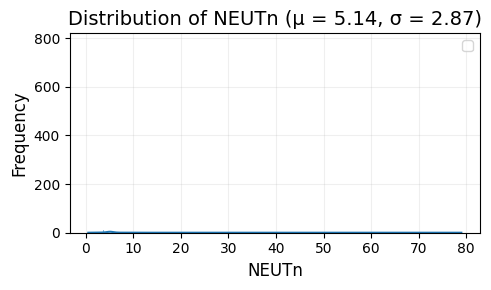

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


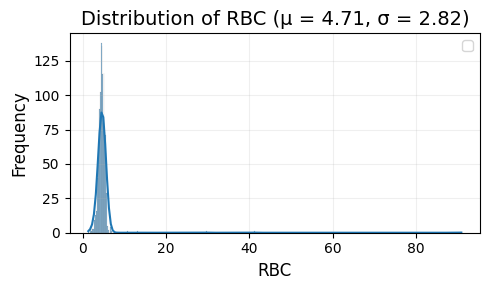

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


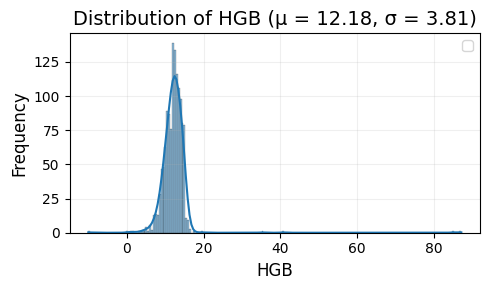

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


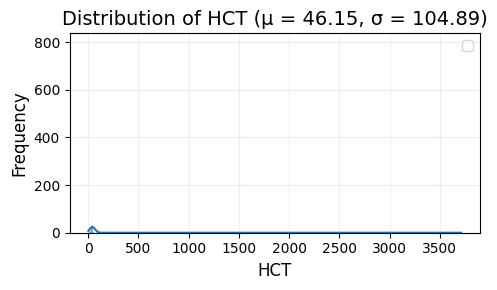

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


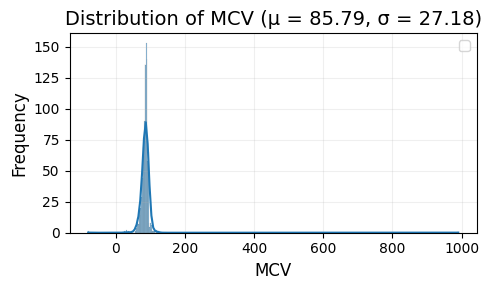

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


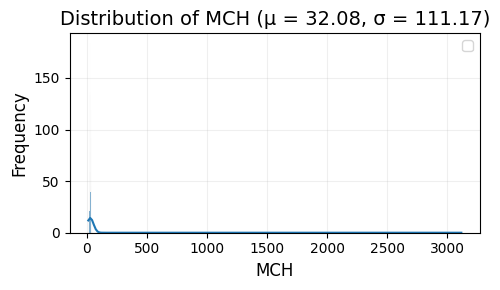

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


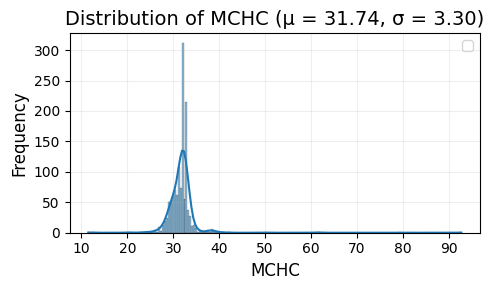

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


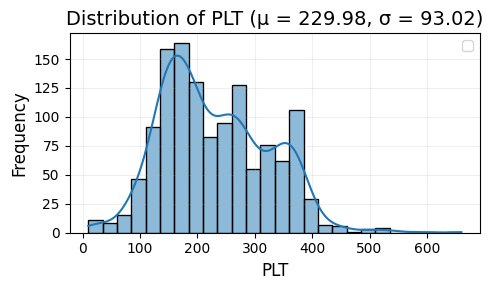

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


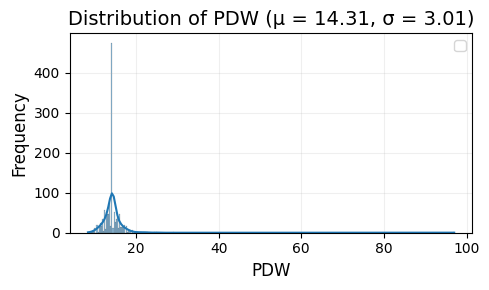

/var/folders/ts/ywdbwyhx7mjdxshvmcbhfqpw0000gn/T/ipykernel_19561/2835045552.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plotter.legend()


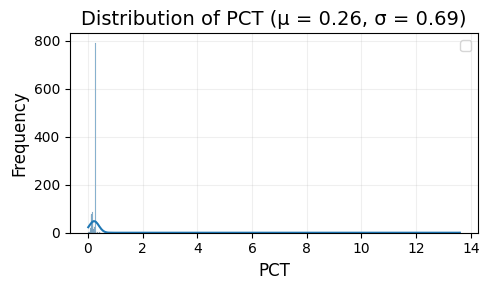

In [ ]:
features = df.drop(columns=['Diagnosis'])
for column in features.columns:
    mean = df[column].mean()
    std = df[column].std()
    data_range = np.linspace(df[column].min() - 1, df[column].max() + 1, 1000)
    
    plotter.figure(figsize=(5, 3))
    sns.histplot(df[column], kde=True)  

    plotter.title(f'Distribution of {column} (μ = {mean:.2f}, σ = {std:.2f})', fontsize=14)
    plotter.xlabel(column, fontsize=12)
    plotter.ylabel('Frequency', fontsize=12)
    plotter.legend()
    plotter.grid(alpha=0.2)
    
    plotter.tight_layout()
    # plotter.savefig(f'histogram_{column}.png', dpi=300)
    plotter.show()

**Data description and any cleaning**

In [18]:
df.shape

(1281, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [20]:
#checking for missing values
df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

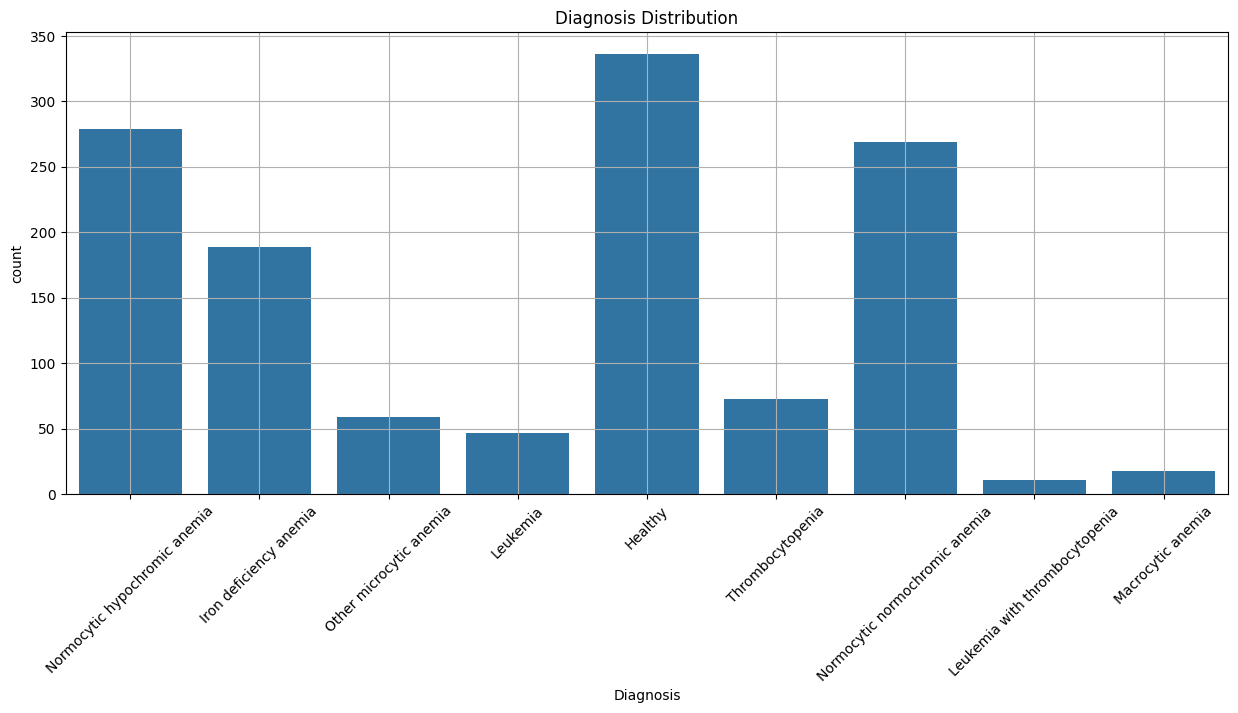

In [21]:
plotter.figure(figsize=(15, 6))
sns.countplot(data=df, x='Diagnosis')
plotter.title('Diagnosis Distribution')
plotter.xticks(rotation=45)
plotter.grid()
plotter.show()

In [22]:
#Using label encoder to convert outcome to binary
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

In [23]:
#We can see which Diagnosis labels are associated with numbers
le.classes_.tolist()

['Healthy',
 'Iron deficiency anemia',
 'Leukemia',
 'Leukemia with thrombocytopenia',
 'Macrocytic anemia',
 'Normocytic hypochromic anemia',
 'Normocytic normochromic anemia',
 'Other microcytic anemia',
 'Thrombocytopenia']

0 = 'Healthy',
1 = 'Iron deficiency anemia',
2 = 'Leukemia',
3 = 'Leukemia with thrombocytopenia',
4 = 'Macrocytic anemia',
5 = 'Normocytic hypochromic anemia',
6 = 'Normocytic normochromic anemia',
7 = 'Other microcytic anemia',
8 = 'Thrombocytopenia'